In [288]:
## Importing all necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [289]:
##pip install -U imbalanced-learn

In [290]:
## Read data from Input File 

df = pd.read_csv("creditcard data.csv")

In [291]:
## shape of the Input DataFrame
df.shape

(150000, 31)

In [292]:
## View the first few records

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [293]:

def dataframe_shape(dataset):
    #check its shape
    print("The shape of the given dataset is : ",dataset.shape)
    shape = dataset.shape
    return shape


In [294]:
dataframe_shape(df)

The shape of the given dataset is :  (150000, 31)


(150000, 31)

In [295]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [296]:
## View the Value distribution in the target variable

df['Class'].value_counts()

0    149707
1       293
Name: Class, dtype: int64

In [297]:
## View the co-relation Matrix

df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.006656,0.022194,-0.075358,-0.042244,0.011597,-0.025394,0.013613,0.007408,-0.141184,...,-0.007037,0.001275,0.017877,0.004650,-0.034363,-0.010951,-0.003118,0.000323,-0.018123,-0.014766
V1,0.006656,1.000000,-0.006033,0.179315,-0.036230,0.005299,0.050058,0.077346,-0.012561,-0.053262,...,-0.020244,-0.052403,-0.088562,-0.015211,0.185394,0.007356,-0.006097,0.129306,-0.232982,-0.123058
V2,0.022194,-0.006033,1.000000,-0.101347,0.027003,-0.034952,0.013131,-0.008456,0.002292,0.009117,...,-0.022088,-0.023184,0.021236,-0.018814,-0.091506,-0.027361,0.007041,0.010671,-0.542549,0.102978
V3,-0.075358,0.179315,-0.101347,1.000000,-0.048037,0.133239,-0.070247,0.162791,-0.094752,0.070776,...,0.036390,0.223425,0.020538,0.024268,-0.170932,0.029804,-0.051094,0.020482,-0.213789,-0.258877
V4,-0.042244,-0.036230,0.027003,-0.048037,1.000000,0.005523,-0.030612,-0.009536,0.026762,0.022481,...,0.024969,0.041580,-0.003787,-0.003993,-0.006017,-0.026363,0.021427,-0.000379,0.094578,0.140940
V5,0.011597,0.005299,-0.034952,0.133239,0.005523,1.000000,0.062083,-0.015665,-0.017799,0.026702,...,-0.042225,-0.085262,0.009377,-0.014861,-0.024355,-0.042388,-0.007560,-0.009759,-0.389755,-0.118197
V6,-0.025394,0.050058,0.013131,-0.070247,-0.030612,0.062083,1.000000,0.013420,-0.040208,0.030748,...,0.009563,0.046673,-0.017835,-0.004497,0.045861,0.009374,-0.017653,-0.004904,0.199186,-0.051312
V7,0.013613,0.077346,-0.008456,0.162791,-0.009536,-0.015665,0.013420,1.000000,0.028672,0.036734,...,0.012391,-0.050383,0.050761,0.000665,-0.097200,-0.024763,-0.080378,-0.041279,0.366734,-0.210947
V8,0.007408,-0.012561,0.002292,-0.094752,0.026762,-0.017799,-0.040208,0.028672,1.000000,-0.005999,...,0.036929,0.019039,-0.029026,0.010800,0.016892,0.012031,0.014820,0.013477,-0.087064,0.046667
V9,-0.141184,-0.053262,0.009117,0.070776,0.022481,0.026702,0.030748,0.036734,-0.005999,1.000000,...,0.012624,0.050931,-0.043694,0.013908,0.116532,0.080862,-0.011700,-0.030089,-0.026876,-0.098910


<Axes: >

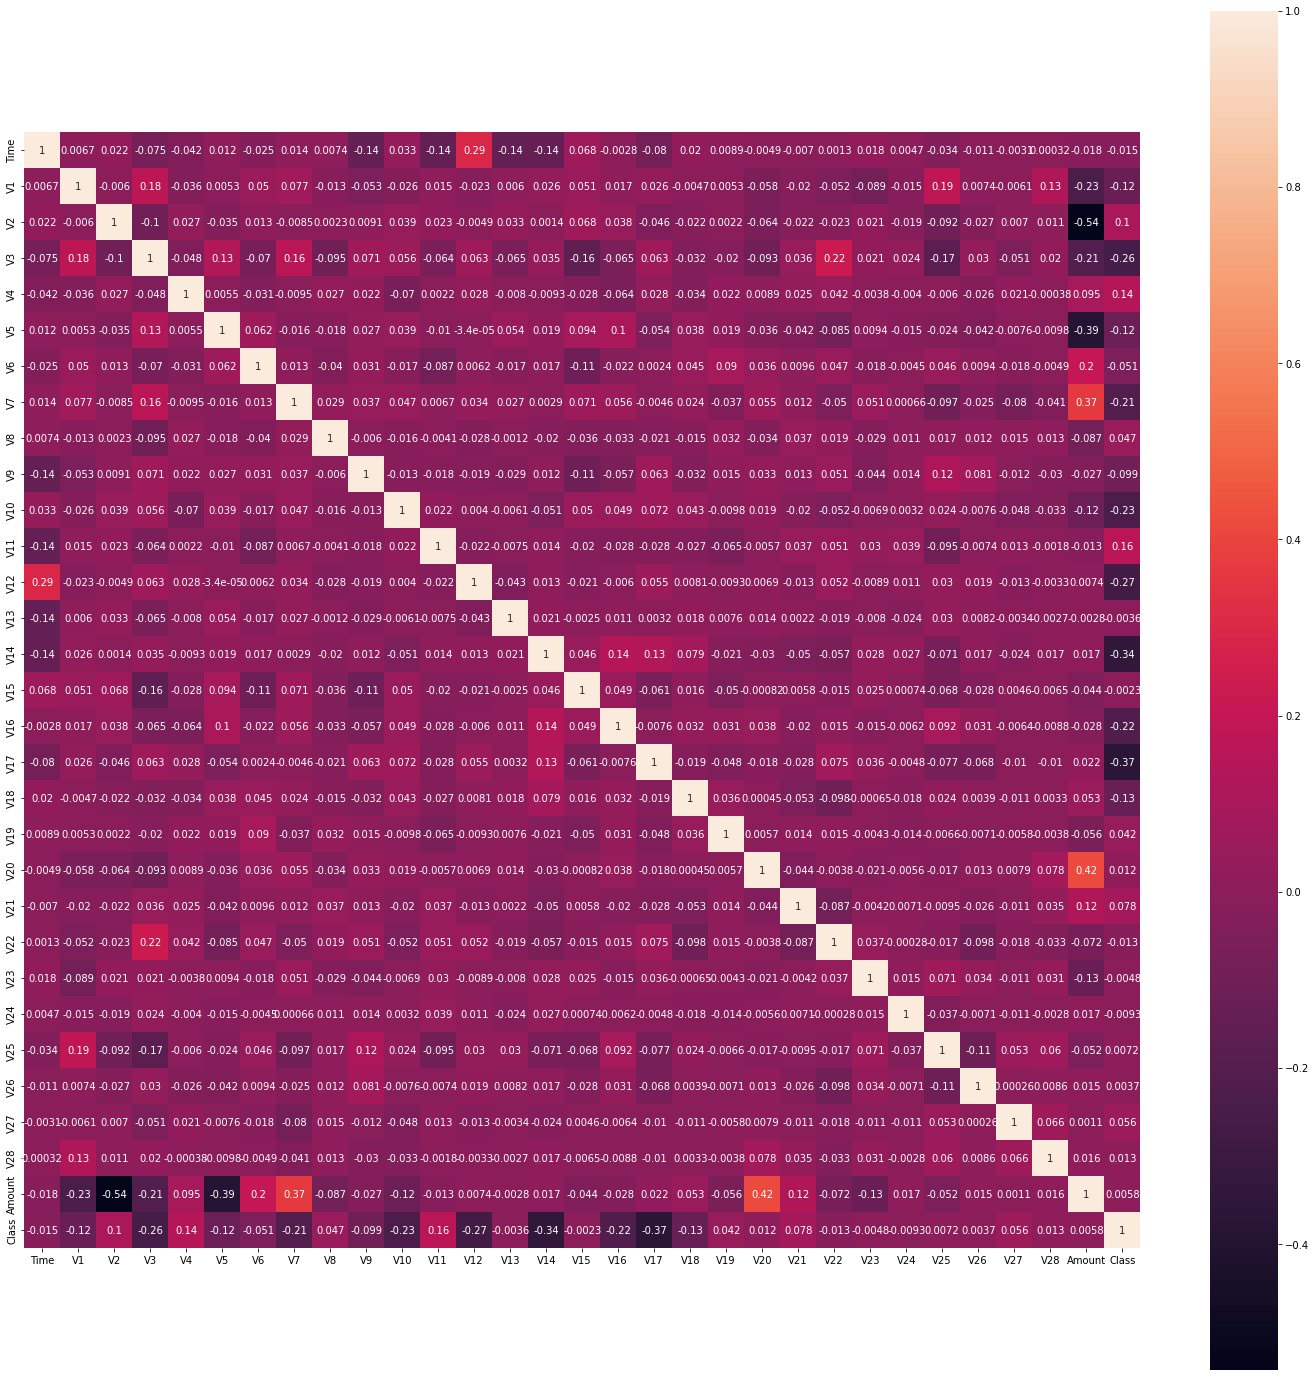

In [298]:
## View the co-relation matrix in the heatmap

f, ax = plt.subplots(figsize = (25,25))
sns.heatmap(df.corr(), square=True, annot=True)

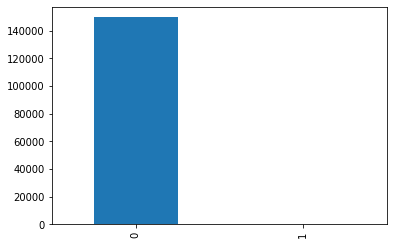

In [299]:

##plt.subplots(figsize = (10,25))
ax = df['Class'].value_counts().plot(kind='bar')

In [300]:
## Using standard Scalar to resize the data

ss = StandardScaler()
df.loc[:,['Amount']] = ss.fit_transform(df.loc[:,['Amount']])

In [301]:
df.shape

(150000, 31)

In [302]:
df['Amount']

0         0.248273
1        -0.355879
2         1.190047
3         0.140872
4        -0.079152
            ...   
149995   -0.108264
149996   -0.211060
149997   -0.350575
149998   -0.059498
149999   -0.297285
Name: Amount, Length: 150000, dtype: float64

In [303]:
df.drop('Time',axis=1,inplace=True)

In [304]:
df.shape

(150000, 30)

In [305]:
## Drop the duplicate values.

df = df.drop_duplicates(inplace=False)

In [306]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.248273,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.355879,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.190047,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140872,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.079152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.724254,0.054124,0.625215,4.308400,-0.532295,0.540379,-0.688445,0.156967,1.476695,0.839266,...,-0.367098,-0.771443,0.364177,-0.100579,-0.547578,-0.348022,-0.011480,-0.023193,-0.108264,0
149996,-3.538487,2.921360,-1.298732,-1.035773,-0.030572,-0.441956,0.631323,0.445681,2.495754,1.441756,...,-0.703023,-0.851606,-0.214636,-1.054619,0.305106,0.132541,-1.261532,-1.029257,-0.211060,0
149997,-0.019481,1.224302,-0.132075,-0.678606,1.768679,-0.283992,1.579740,-0.978318,1.874612,0.551191,...,-0.036681,1.134522,-0.311552,0.051861,-0.616234,-0.329780,0.220292,-0.232384,-0.350575,0
149998,-0.511063,1.277683,-0.174698,-0.101018,0.970555,-1.040956,1.563977,-1.449619,0.595721,-1.037676,...,0.836970,0.470593,-0.314103,0.066781,0.363133,-0.073593,0.183600,0.121156,-0.059498,0


In [307]:
df.shape

(145366, 30)

In [308]:
## Split the data into features and target

X = df.drop('Class',axis=1)
y = df['Class']

In [309]:
X.shape,y.shape

((145366, 29), (145366,))

In [310]:
## Using SMOTE sampling technique to deal class imbalance.

sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y)

In [311]:
## Split the data into train and test.

x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, random_state = 4,train_size=.80)

In [312]:
## View the shape of the train and test

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((232131, 29), (58033, 29), (232131,), (58033,))

In [313]:
## Using StratifiedKFold Cross Validation Technique to avoid overfitting .

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy,cm,cr = {},{},{}

In [323]:
## Using Logistic Regression to fit the data.


LR = LogisticRegression()
scores = cross_val_score(LDA, x_train, y_train,cv=kfold, scoring='accuracy', n_jobs=-1)
LR.fit(x_train,y_train)
predictions = LR.predict(x_test)
accuracy['LR'] = accuracy_score(predictions,y_test)
cm['LR'] = confusion_matrix(predictions,y_test)
cr['LR'] = classification_report(predictions,y_test)

In [322]:
## Calculate the accuracy Values.

print(np.mean(scores),np.std(scores))
print(accuracy['LR'],cm['LR'])
print(cr['LR'])


0.9176154904966634 0.0012441536135602838
0.9553357572415695 [[28447  1924]
 [  668 26994]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     30371
           1       0.93      0.98      0.95     27662

    accuracy                           0.96     58033
   macro avg       0.96      0.96      0.96     58033
weighted avg       0.96      0.96      0.96     58033



In [325]:
##  Using LDA to train and fir the data.

LDA = LinearDiscriminantAnalysis()
scores = cross_val_score(LDA, x_train, y_train,cv=kfold, scoring='accuracy', n_jobs=-1)
LDA.fit(x_train,y_train)
predictions = LDA.predict(x_test)
accuracy['LDA'] = accuracy_score(predictions,y_test)
cm['LDA'] = confusion_matrix(predictions,y_test)
cr['LDA'] = classification_report(predictions,y_test)


In [326]:
## Measure the accuracy values.

print(np.mean(scores),np.std(scores)) 
print(accuracy['LDA'],cm['LDA'])
print(cr['LDA'])

0.9176154904966634 0.0012441536135602838
0.9194768493788017 [[28523  4081]
 [  592 24837]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     32604
           1       0.86      0.98      0.91     25429

    accuracy                           0.92     58033
   macro avg       0.92      0.93      0.92     58033
weighted avg       0.93      0.92      0.92     58033



In [327]:
## Using Gaussian Algoithm to train the data.


NB = GaussianNB()
scores = cross_val_score(LDA, x_train, y_train,cv=kfold, scoring='accuracy', n_jobs=-1)
NB.fit(x_train,y_train)
predictions = NB.predict(x_test)
accuracy['NB'] = accuracy_score(predictions,y_test)
cm['NB'] = confusion_matrix(predictions,y_test)
cr['NB'] = classification_report(predictions,y_test)


In [328]:
## Measuring Accuracy Values.

print(np.mean(scores),np.std(scores)) 
print(accuracy['NB'],cm['NB'])
print(cr['NB'])

0.9176154904966634 0.0012441536135602838
0.9162545448279428 [[28432  4177]
 [  683 24741]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     32609
           1       0.86      0.97      0.91     25424

    accuracy                           0.92     58033
   macro avg       0.92      0.92      0.92     58033
weighted avg       0.92      0.92      0.92     58033

